In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('nba_players_stats_19_20_per_game.csv')
pd.options.display.max_columns=100
df.head(n=5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander\alexaky01,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,NaN,0.5,1.0,0.500,0.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [4]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000,651.000000,616.000000,651.000000,651.000000,645.000000,649.000000,651.000000,651.000000,618.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,260.838710,25.763441,38.21659,17.537634,19.179724,3.097849,6.861444,0.442891,0.938863,2.695392,0.313438,2.160829,4.167435,0.507447,0.506704,1.337788,1.750538,0.743769,0.817051,2.748694,3.563287,1.843932,0.617665,0.398157,1.101075,1.740092,8.461290
std,154.310925,4.024840,22.94443,23.022124,9.060972,2.222285,4.667673,0.111526,0.849802,2.191573,0.133521,1.777765,3.284642,0.124870,0.110181,1.338949,1.658084,0.150642,0.727948,1.841340,2.429509,1.698073,0.406082,0.409010,0.807703,0.819891,6.197278
min,1.000000,19.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.500000,23.000000,15.50000,0.000000,12.000000,1.400000,3.400000,0.399000,0.300000,1.000000,0.270750,0.850000,1.800000,0.459000,0.475000,0.500000,0.700000,0.667000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.600000,1.100000,3.800000
50%,256.000000,25.000000,41.00000,4.000000,18.500000,2.500000,5.600000,0.439000,0.800000,2.300000,0.339000,1.600000,3.100000,0.509000,0.518000,0.900000,1.300000,0.770500,0.600000,2.400000,3.100000,1.300000,0.600000,0.300000,0.900000,1.700000,6.800000
75%,395.500000,28.000000,59.00000,29.500000,26.700000,4.300000,9.400000,0.486000,1.400000,3.800000,0.378250,2.900000,5.500000,0.569000,0.557000,1.700000,2.300000,0.836000,1.100000,3.650000,4.650000,2.200000,0.900000,0.500000,1.400000,2.300000,11.650000
max,529.000000,43.000000,74.00000,73.000000,37.500000,10.900000,22.900000,1.000000,4.400000,12.400000,1.000000,9.600000,18.700000,1.000000,1.000000,10.200000,11.800000,1.000000,4.600000,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000


In [6]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

## Chose TRB, AST, PTS as metrics to focus on

In [8]:
new_columns = ['Rk','Player','TRB','AST','PTS']
df3 = df.reindex(columns=new_columns)
df3.head(10)

,Rk,Player,TRB,AST,PTS
0,1,Steven Adams\adamsst01,9.3,2.3,10.9
1,2,Bam Adebayo\adebaba01,10.2,5.1,15.9
2,3,LaMarcus Aldridge\aldrila01,7.4,2.4,18.9
3,4,Kyle Alexander\alexaky01,1.5,0.0,1.0
4,5,Nickeil Alexander-Walker\alexani01,1.8,1.9,5.7
5,6,Grayson Allen\allengr01,2.2,1.4,8.7
6,7,Jarrett Allen\allenja01,9.6,1.6,11.1
7,8,Kadeem Allen\allenka01,0.9,2.1,5.0
8,9,Al-Farouq Aminu\aminual01,4.8,1.2,4.3
9,10,Justin Anderson\anderju01,2.1,0.8,2.8


## Histogram and CDF of respective stats

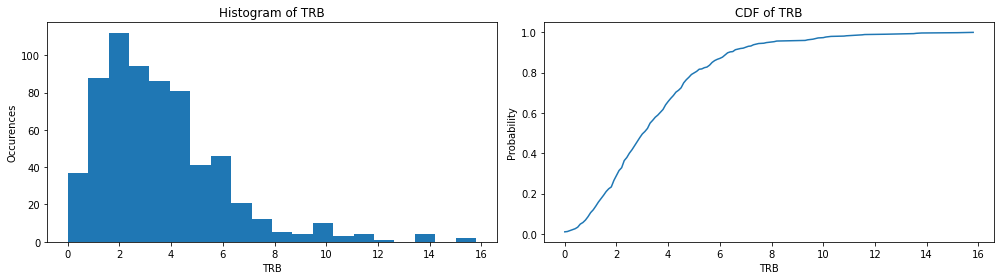

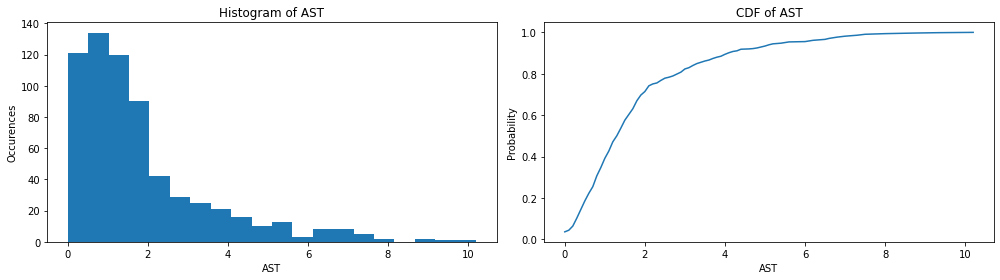

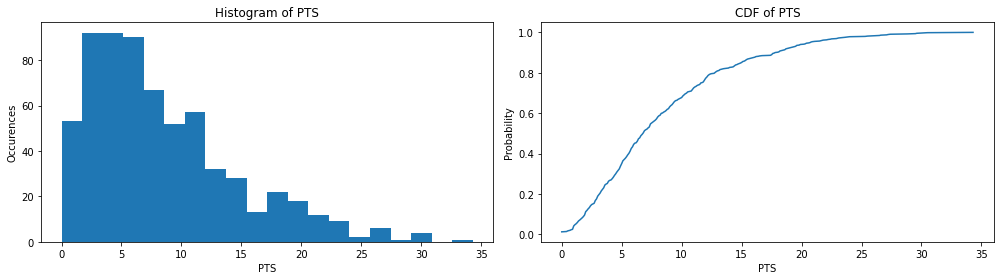

In [10]:
for i in range(2,5):
    f= plt.figure(figsize=(14,4))
    ax1 = f.add_subplot(121)
    ax1.hist(df3.iloc[:,i],bins=20)
    ax1.set_xlabel(new_columns[i])
    ax1.set_ylabel('Occurences')
    ax1.set_title('Histogram of ' + new_columns[i])
    
    stat = df3.iloc[:,i]
    cdf = stat.value_counts().sort_index().cumsum()/np.sum(stat.value_counts())
    ax2 = f.add_subplot(122)
    ax2.plot(cdf)
    ax2.set_xlabel(new_columns[i])
    ax2.set_ylabel('Probability')
    ax2.set_title('CDF of ' + new_columns[i])
    plt.tight_layout()
    plt.savefig(new_columns[i]+"_distr.png")

### Different Ways to Plot CDF

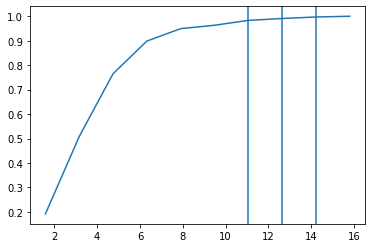

In [11]:
trb = df3.iloc[:,2]
hist,bin_edges = np.histogram(trb,bins=10)
percentage = hist/np.sum(hist)
cdf = np.cumsum(percentage)
plt.plot(bin_edges[1:],cdf)
plt.axvline(bin_edges[-2])
plt.axvline(bin_edges[-3])
plt.axvline(bin_edges[-4])

## Visualizing CDF Cutoffs for TRB, AST, and PTS

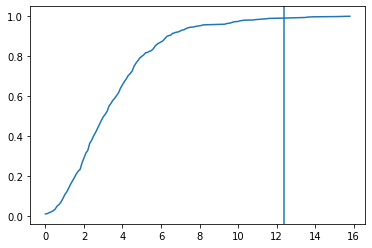

12.4    0.990783
13.5    0.993856
13.6    0.995392
13.8    0.996928
15.2    0.998464
15.8    1.000000
Name: TRB, dtype: float64
[12, 106, 183, 184, 229, 534, 626]


,Rk,Player,TRB,AST,PTS
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5
106,87,Clint Capela\capelca01,13.8,1.2,13.9
183,140,Andre Drummond\drumman01,15.2,2.7,17.7
184,140,Andre Drummond\drumman01,15.8,2.8,17.8
229,176,Rudy Gobert\goberru01,13.5,1.5,15.1
534,436,Domantas Sabonis\sabondo01,12.4,5.0,18.5
626,509,Hassan Whiteside\whiteha01,13.5,1.2,15.5


In [9]:
trb = df3.iloc[:,2]
cdf = trb.value_counts().sort_index().cumsum()/np.sum(trb.value_counts())
plt.plot(cdf)
plt.axvline(cdf.index[cdf>0.99].tolist()[0])
plt.show()
print(cdf[cdf.index[cdf>0.99]])
print(trb.index[trb>=cdf.index[cdf>0.99][0]].tolist())
df3.loc[trb.index[trb>=cdf.index[cdf>0.99][0]]]

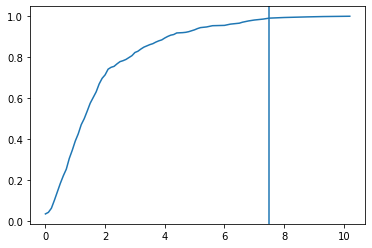

7.5     0.990783
8.0     0.993856
8.8     0.996928
9.3     0.998464
10.2    1.000000
Name: AST, dtype: float64
[177, 233, 257, 319, 376, 382, 530, 549, 646]


,Rk,Player,TRB,AST,PTS
177,134,Luka Dončić\doncilu01,9.4,8.8,28.8
233,180,Devonte' Graham\grahade01,3.4,7.5,18.2
257,198,James Harden\hardeja01,6.6,7.5,34.3
319,250,LeBron James\jamesle01,7.8,10.2,25.3
376,297,Damian Lillard\lillada01,4.3,8.0,30.0
382,303,Kyle Lowry\lowryky01,5.0,7.5,19.4
530,434,Ricky Rubio\rubiori01,4.7,8.8,13.0
549,451,Ben Simmons\simmobe01,7.8,8.0,16.4
646,525,Trae Young\youngtr01,4.3,9.3,29.6


In [10]:
ast = df3.iloc[:,3]
cdf = ast.value_counts().sort_index().cumsum()/np.sum(ast.value_counts())
plt.plot(cdf)
plt.axvline(cdf.index[cdf>0.99].tolist()[0])
plt.show()
print(cdf[cdf.index[cdf>0.99]])
print(ast.index[ast>=cdf.index[cdf>0.99][0]].tolist())
df3.loc[ast.index[ast>=cdf.index[cdf>0.99][0]]]

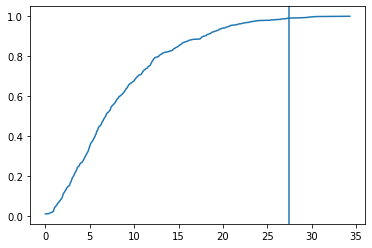

27.4    0.990783
28.8    0.992320
29.5    0.993856
29.6    0.995392
30.0    0.996928
30.5    0.998464
34.3    1.000000
Name: PTS, dtype: float64
[12, 40, 177, 257, 308, 376, 646]


,Rk,Player,TRB,AST,PTS
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5
40,35,Bradley Beal\bealbr01,4.2,6.1,30.5
177,134,Luka Dončić\doncilu01,9.4,8.8,28.8
257,198,James Harden\hardeja01,6.6,7.5,34.3
308,241,Kyrie Irving\irvinky01,5.2,6.4,27.4
376,297,Damian Lillard\lillada01,4.3,8.0,30.0
646,525,Trae Young\youngtr01,4.3,9.3,29.6


In [54]:
pts = df3.iloc[:,4]
cdf = pts.value_counts().sort_index().cumsum()/np.sum(pts.value_counts())
plt.plot(cdf)
plt.axvline(cdf.index[cdf>0.99].tolist()[0])
plt.show()
print(cdf[cdf.index[cdf>0.99]])
print(pts.index[pts>=cdf.index[cdf>0.99][0]].tolist())
df3.loc[pts.index[pts>=cdf.index[cdf>0.99][0]]]

In [216]:
trb = df3.iloc[:,2]
trb_cdf = trb.value_counts().sort_index().cumsum()/np.sum(trb.value_counts())
ast = df3.iloc[:,3]
ast_cdf = ast.value_counts().sort_index().cumsum()/np.sum(ast.value_counts())
pts = df3.iloc[:,4]
pts_cdf = pts.value_counts().sort_index().cumsum()/np.sum(pts.value_counts())

In [226]:
pts_cdf[pts_cdf.index>25]

25.3    0.980031
25.5    0.981567
26.1    0.983103
26.5    0.984639
26.6    0.986175
27.1    0.987711
27.2    0.989247
27.4    0.990783
28.8    0.992320
29.5    0.993856
29.6    0.995392
30.0    0.996928
30.5    0.998464
34.3    1.000000
Name: PTS, dtype: float64

## One Class Support Vector Machine (SVM)

In [202]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(kernel='rbf',nu=0.03,tol=1e-10)

clf.fit(df3.iloc[:,2:])
pred = clf.predict(df3.iloc[:,2:])
decision = clf.decision_function(df3.iloc[:,2:])

data1 = df3.assign(prediction=pred, Score = decision)

In [203]:
inliers = data1.loc[data1["prediction"]==1]
outliers = data1.loc[data1["prediction"]==-1].sort_values(by='Score')
outliers

,Rk,Player,TRB,AST,PTS,prediction,Score
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5,-1,-1.065245e+00
257,198,James Harden\hardeja01,6.6,7.5,34.3,-1,-8.853904e-01
184,140,Andre Drummond\drumman01,15.8,2.8,17.8,-1,-3.569293e-01
530,434,Ricky Rubio\rubiori01,4.7,8.8,13.0,-1,-3.015574e-01
183,140,Andre Drummond\drumman01,15.2,2.7,17.7,-1,-1.832126e-01
319,250,LeBron James\jamesle01,7.8,10.2,25.3,-1,-1.560032e-01
646,525,Trae Young\youngtr01,4.3,9.3,29.6,-1,-1.409249e-01
40,35,Bradley Beal\bealbr01,4.2,6.1,30.5,-1,-1.355405e-01
106,87,Clint Capela\capelca01,13.8,1.2,13.9,-1,-1.051391e-01
232,179,Eric Gordon\gordoer01,2.0,1.5,14.4,-1,-7.313123e-02


In [204]:
top3 = outliers[:3]
outliers = outliers[3:]
top3

,Rk,Player,TRB,AST,PTS,prediction,Score
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5,-1,-1.065245
257,198,James Harden\hardeja01,6.6,7.5,34.3,-1,-0.885390
184,140,Andre Drummond\drumman01,15.8,2.8,17.8,-1,-0.356929


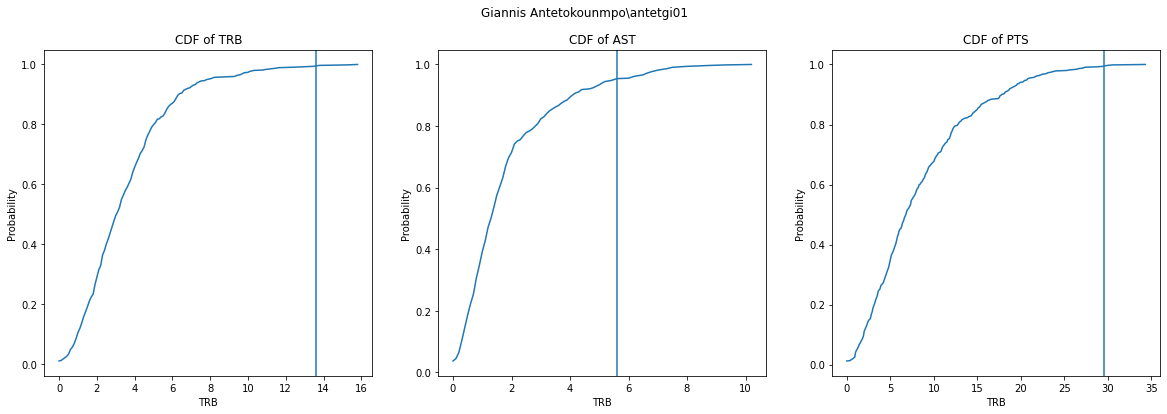

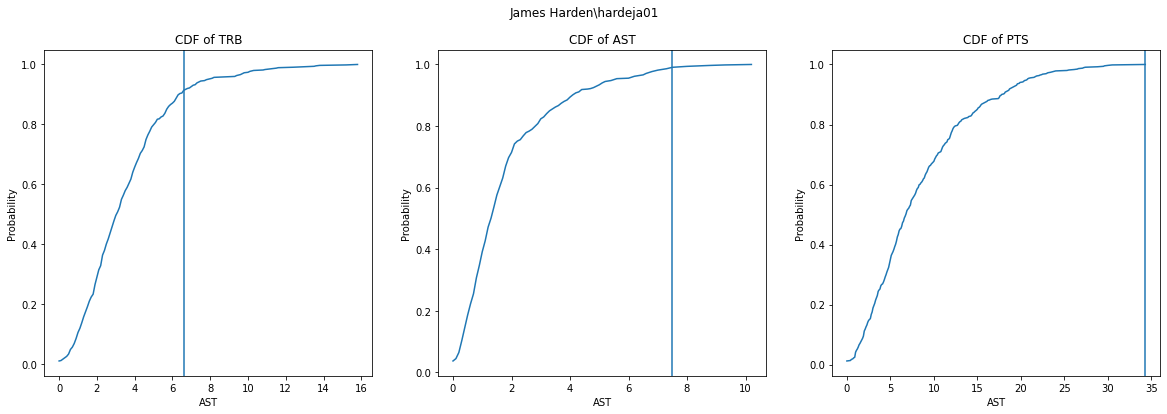

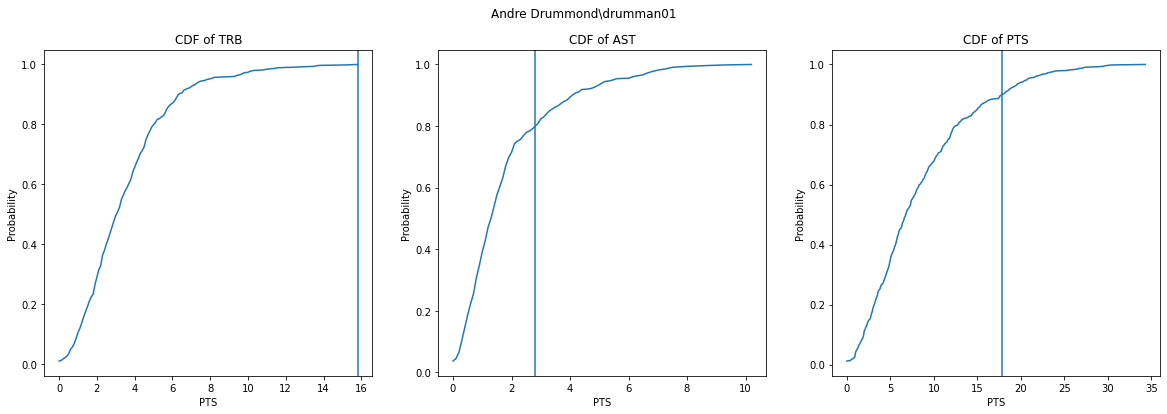

In [205]:
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.suptitle(top3.iloc[i]["Player"])

    axes[0].plot(trb_cdf)
    axes[0].set_xlabel(new_columns[i+2])
    axes[0].set_ylabel('Probability')
    axes[0].set_title('CDF of TRB')
    axes[0].axvline(top3.iloc[i]["TRB"])


    axes[1].plot(ast_cdf)
    axes[1].set_xlabel(new_columns[i+2])
    axes[1].set_ylabel('Probability')
    axes[1].set_title('CDF of AST')
    axes[1].axvline(top3.iloc[i]["AST"])

    axes[2].plot(pts_cdf)
    axes[2].set_xlabel(new_columns[i+2])
    axes[2].set_ylabel('Probability')
    axes[2].set_title('CDF of PTS')
    axes[2].axvline(top3.iloc[i]["PTS"])
    plt.savefig("data/svm_cdf"+str(i)+".png")
    plt.show()
    


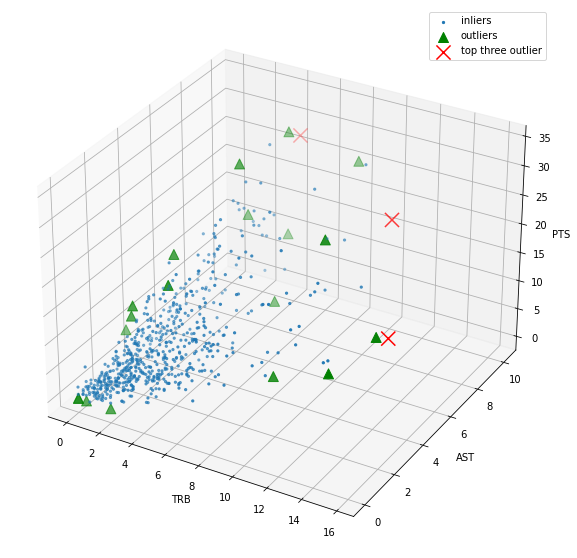

In [206]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inliers["TRB"],inliers["AST"],inliers["PTS"],marker='.',label="inliers")
ax.scatter(outliers["TRB"],outliers["AST"],outliers["PTS"],marker='^',label="outliers", s= 100,c='g')
ax.scatter(top3["TRB"],top3["AST"],top3["PTS"],marker='x',label="top three outlier", s=200, c='r')
ax.set_xlabel("TRB")
ax.set_ylabel("AST")
ax.set_zlabel("PTS")
ax.legend()
plt.savefig("data/"+"svm"+"3d.png")
plt.show()

In [166]:
output = data1.reindex(columns=["Player","Score"])
output = output.sort_values(by="Score")
output.to_csv(path_or_buf="One_Class_SVM_Scores.csv",index=False)

## Played around with scaling and normalizing data. Not worth doing

In [175]:
from sklearn.preprocessing import normalize, scale
df3_scaled = df3.copy()
df3_scaled.iloc[:,2:] = scale(df3.iloc[:,2:]) 
df3_normed = df3.copy()
df3_normed.iloc[:,2:] = normalize(df3.iloc[:,2:])

## Elliptic Envelope


In [191]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination = 0.03)
clf.fit(df3.iloc[:,2:])
pred = clf.predict(df3.iloc[:,2:])
decision = clf.decision_function(df3.iloc[:,2:])

data2 = df3.assign(prediction=pred, Score = decision)

In [192]:
inliers = data2.loc[data2["prediction"]==1]
outliers = data2.loc[data2["prediction"]==-1].sort_values(by='Score')
outliers

,Rk,Player,TRB,AST,PTS,prediction,Score
319,250,LeBron James\jamesle01,7.8,10.2,25.3,-1,-141.086424
530,434,Ricky Rubio\rubiori01,4.7,8.8,13.0,-1,-128.419888
646,525,Trae Young\youngtr01,4.3,9.3,29.6,-1,-92.281496
549,451,Ben Simmons\simmobe01,7.8,8.0,16.4,-1,-68.500995
490,398,Elfrid Payton\paytoel01,4.7,7.2,10.0,-1,-59.973698
177,134,Luka Dončić\doncilu01,9.4,8.8,28.8,-1,-58.018427
376,297,Damian Lillard\lillada01,4.3,8.0,30.0,-1,-42.882306
25,24,Lonzo Ball\balllo01,6.1,7.0,11.8,-1,-42.383534
233,180,Devonte' Graham\grahade01,3.4,7.5,18.2,-1,-34.917269
241,186,Draymond Green\greendr01,6.2,6.2,8.0,-1,-31.047670


In [193]:
top3 = outliers[:3]
outliers = outliers[3:]
top3

,Rk,Player,TRB,AST,PTS,prediction,Score
319,250,LeBron James\jamesle01,7.8,10.2,25.3,-1,-141.086424
530,434,Ricky Rubio\rubiori01,4.7,8.8,13.0,-1,-128.419888
646,525,Trae Young\youngtr01,4.3,9.3,29.6,-1,-92.281496


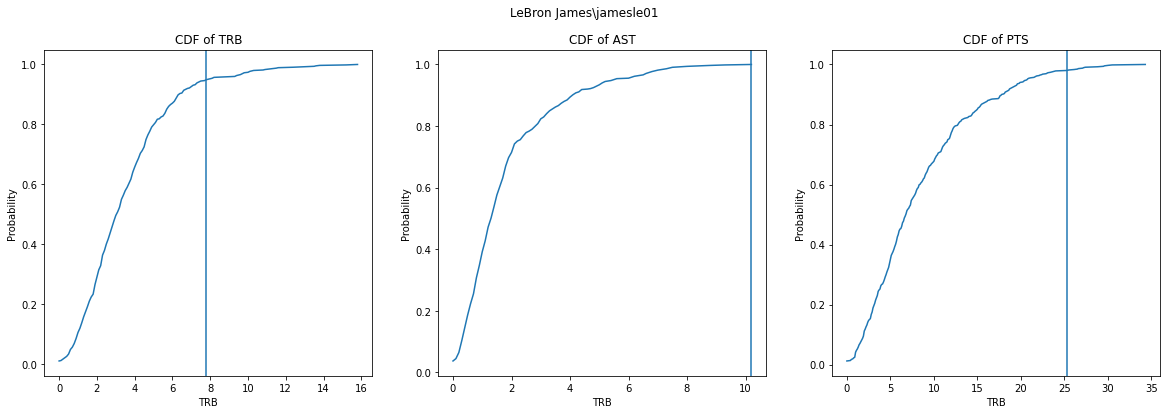

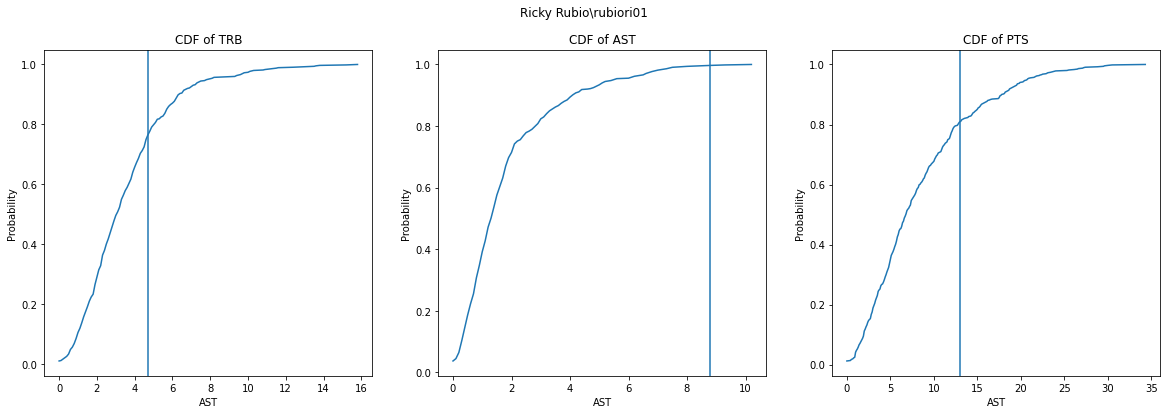

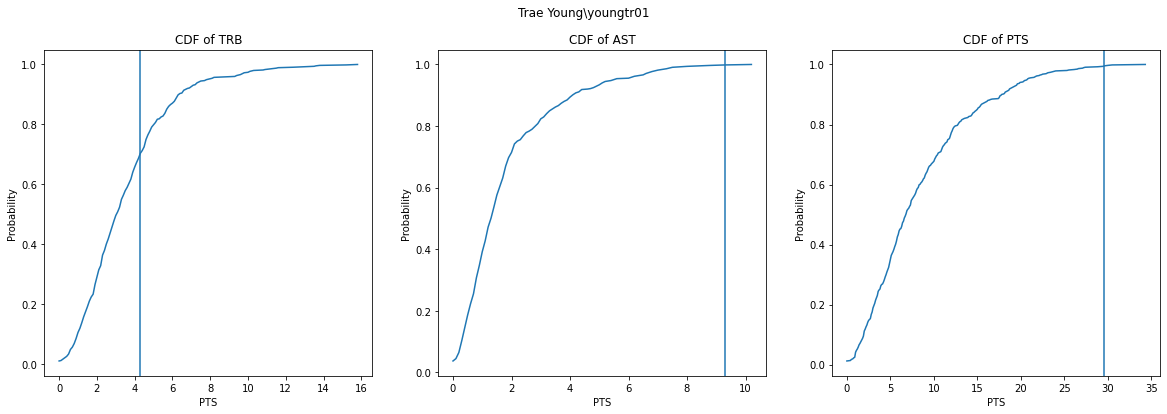

In [194]:
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.suptitle(top3.iloc[i]["Player"])

    axes[0].plot(trb_cdf)
    axes[0].set_xlabel(new_columns[i+2])
    axes[0].set_ylabel('Probability')
    axes[0].set_title('CDF of TRB')
    axes[0].axvline(top3.iloc[i]["TRB"])


    axes[1].plot(ast_cdf)
    axes[1].set_xlabel(new_columns[i+2])
    axes[1].set_ylabel('Probability')
    axes[1].set_title('CDF of AST')
    axes[1].axvline(top3.iloc[i]["AST"])

    axes[2].plot(pts_cdf)
    axes[2].set_xlabel(new_columns[i+2])
    axes[2].set_ylabel('Probability')
    axes[2].set_title('CDF of PTS')
    axes[2].axvline(top3.iloc[i]["PTS"])
    plt.savefig("data/ellip_cdf"+str(i)+".png")
    plt.show()

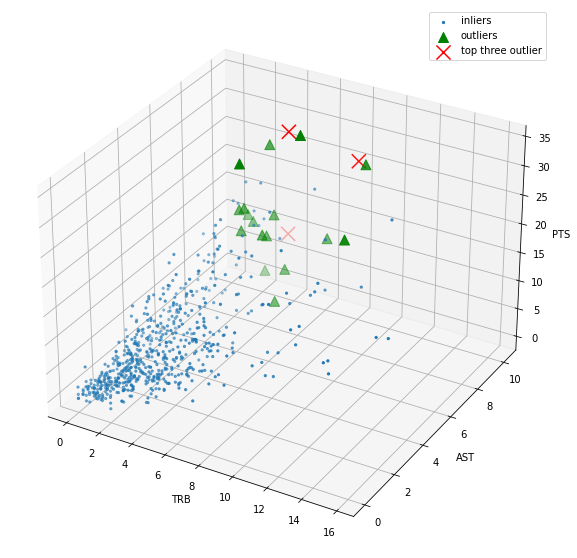

In [195]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inliers["TRB"],inliers["AST"],inliers["PTS"],marker='.',label="inliers")
ax.scatter(outliers["TRB"],outliers["AST"],outliers["PTS"],marker='^',label="outliers", s= 100,c='g')
ax.scatter(top3["TRB"],top3["AST"],top3["PTS"],marker='x',label="top three outlier", s=200, c='r')
ax.set_xlabel("TRB")
ax.set_ylabel("AST")
ax.set_zlabel("PTS")
ax.legend()
plt.savefig("data/"+"ellip"+"3d.png")
plt.show()

In [196]:
output2 = data2.reindex(columns=["Player","Score"])
output2 = output2.sort_values(by="Score")
output2

,Player,Score
319,LeBron James\jamesle01,-141.086424
530,Ricky Rubio\rubiori01,-128.419888
646,Trae Young\youngtr01,-92.281496
549,Ben Simmons\simmobe01,-68.500995
490,Elfrid Payton\paytoel01,-59.973698
...,...,...
149,Allen Crabbe\crabbal01,83.506063
61,Bol Bol\bolbo01,83.514659
327,James Johnson\johnsja01,83.543243
235,Treveon Graham\grahatr01,83.552602


In [197]:
output2.to_csv(path_or_buf="Elliptical_Envelope_Scores.csv",index=False)

## Isolation Forrest

In [207]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.03)
clf.fit(df3.iloc[:,2:])
pred = clf.predict(df3.iloc[:,2:])
decision = clf.decision_function(df3.iloc[:,2:])

data3 = df3.assign(prediction=pred, Score = decision)

In [208]:
inliers = data3.loc[data3["prediction"]==1]
outliers = data3.loc[data3["prediction"]==-1].sort_values(by='Score')
outliers

,Rk,Player,TRB,AST,PTS,prediction,Score
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5,-1,-0.128898
177,134,Luka Dončić\doncilu01,9.4,8.8,28.8,-1,-0.115191
646,525,Trae Young\youngtr01,4.3,9.3,29.6,-1,-0.098031
319,250,LeBron James\jamesle01,7.8,10.2,25.3,-1,-0.091798
257,198,James Harden\hardeja01,6.6,7.5,34.3,-1,-0.080771
184,140,Andre Drummond\drumman01,15.8,2.8,17.8,-1,-0.075079
183,140,Andre Drummond\drumman01,15.2,2.7,17.7,-1,-0.070893
376,297,Damian Lillard\lillada01,4.3,8.0,30.0,-1,-0.063360
530,434,Ricky Rubio\rubiori01,4.7,8.8,13.0,-1,-0.039775
534,436,Domantas Sabonis\sabondo01,12.4,5.0,18.5,-1,-0.038890


In [209]:
top3 = outliers[:3]
outliers = outliers[3:]
top3

,Rk,Player,TRB,AST,PTS,prediction,Score
12,13,Giannis Antetokounmpo\antetgi01,13.6,5.6,29.5,-1,-0.128898
177,134,Luka Dončić\doncilu01,9.4,8.8,28.8,-1,-0.115191
646,525,Trae Young\youngtr01,4.3,9.3,29.6,-1,-0.098031


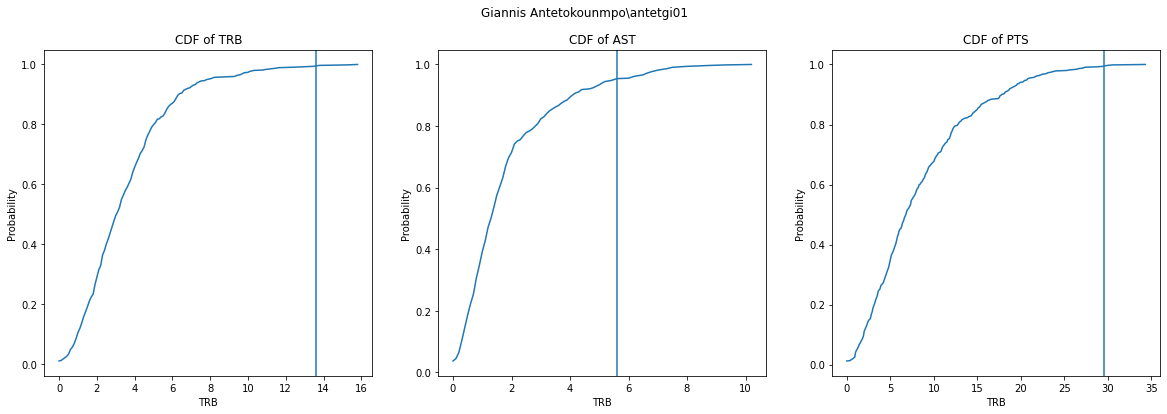

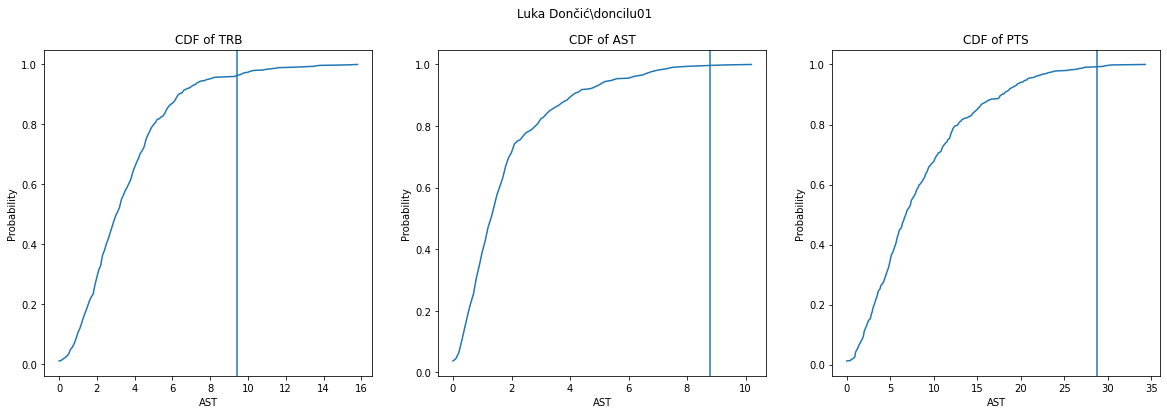

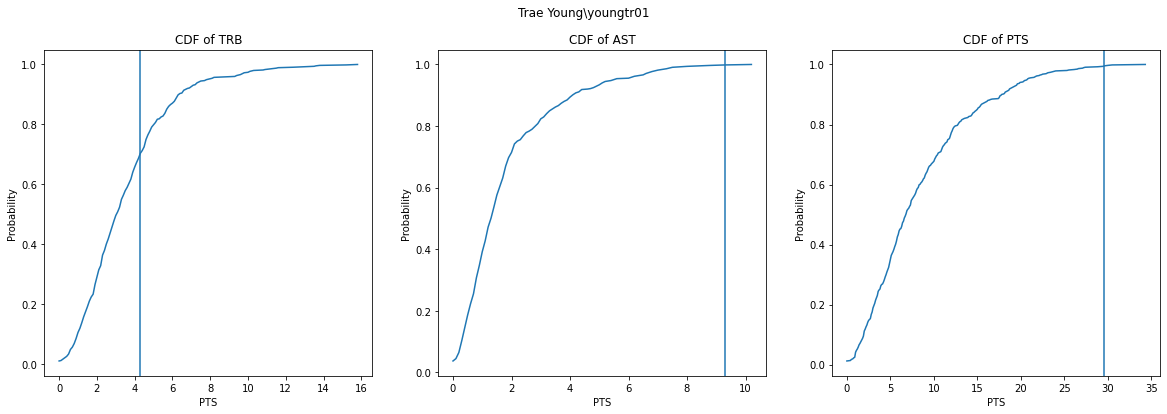

In [210]:
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.suptitle(top3.iloc[i]["Player"])

    axes[0].plot(trb_cdf)
    axes[0].set_xlabel(new_columns[i+2])
    axes[0].set_ylabel('Probability')
    axes[0].set_title('CDF of TRB')
    axes[0].axvline(top3.iloc[i]["TRB"])


    axes[1].plot(ast_cdf)
    axes[1].set_xlabel(new_columns[i+2])
    axes[1].set_ylabel('Probability')
    axes[1].set_title('CDF of AST')
    axes[1].axvline(top3.iloc[i]["AST"])

    axes[2].plot(pts_cdf)
    axes[2].set_xlabel(new_columns[i+2])
    axes[2].set_ylabel('Probability')
    axes[2].set_title('CDF of PTS')
    axes[2].axvline(top3.iloc[i]["PTS"])
    plt.savefig("data/isoforest_cdf"+str(i)+".png")
    plt.show()
    


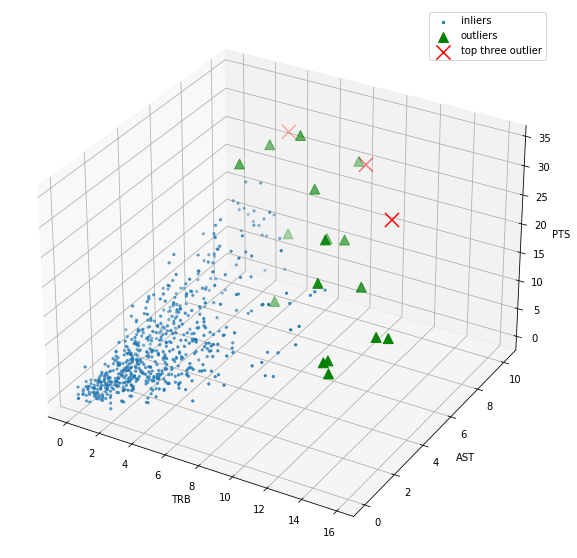

In [211]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inliers["TRB"],inliers["AST"],inliers["PTS"],marker='.',label="inliers")
ax.scatter(outliers["TRB"],outliers["AST"],outliers["PTS"],marker='^',label="outliers", s= 100,c='g')
ax.scatter(top3["TRB"],top3["AST"],top3["PTS"],marker='x',label="top three outlier", s=200, c='r')
ax.set_title('3d Scatter with Isolation Forest')
ax.set_xlabel("TRB")
ax.set_ylabel("AST")
ax.set_zlabel("PTS")
ax.legend()
plt.savefig("data/"+"isoforest"+"3d.png")
plt.show()

In [212]:
output3 = data3.reindex(columns=["Player","Score"])
output3 = output3.sort_values(by="Score")
output3

,Player,Score
12,Giannis Antetokounmpo\antetgi01,-0.128898
177,Luka Dončić\doncilu01,-0.115191
646,Trae Young\youngtr01,-0.098031
319,LeBron James\jamesle01,-0.091798
257,James Harden\hardeja01,-0.080771
...,...,...
520,Jerome Robinson\robinje01,0.216422
234,Treveon Graham\grahatr01,0.217142
580,Anthony Tolliver\tollian01,0.217199
149,Allen Crabbe\crabbal01,0.218966


In [213]:
output3.to_csv(path_or_buf="Isolation_Forrest_Scores.csv",index=False)